# FreeCodeCamp Data Analysis with Python Course
### Project 4: [Page View Time Series Analyzer](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("./data/fcc_forum_pageviews.csv", 
                 index_col="date", parse_dates=True)

# Clean data
df = df.drop(df[
    (df["value"] < df["value"].quantile(0.025)) | 
    (df["value"] > df["value"].quantile(0.975))
].index)


def draw_line_plot():
    # Draw line plot
    fig = plt.figure(figsize=(12, 6))
    plt.plot(df["value"], color="#D62728")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["Year"] = df_bar.index.year
    df_bar["Month"] = df_bar.index.month
    months = ["January", "February", "March", "April", "May", "June", "July",
            "August", "September", "October", "November", "December"]
    df_bar = df_bar.groupby(["Year", "Month"])["value"].mean().unstack()

    # Draw bar plot
    fig = df_bar.plot.bar(figsize=(12, 8)).figure
    plt.legend(title="Months", labels=months)
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = [d.year for d in df_box.date]
    df_box['Month'] = [d.month for d in df_box.date]

    # Draw box plots (using Seaborn)
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    fig, (year_axes, month_axes) = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(x="Year", y="value", data=df_box, ax=year_axes)
    year_axes.set_title("Year-wise Box Plot (Trend)")
    year_axes.set_ylabel("Page Views")

    sns.boxplot(x="Month", y="value", data=df_box, ax=month_axes)
    month_axes.set_title("Month-wise Box Plot (Seasonality)")
    month_axes.set_xticks([i for i in range(12)], months)
    month_axes.set_ylabel("Page Views")

    plt.tight_layout()
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [4]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


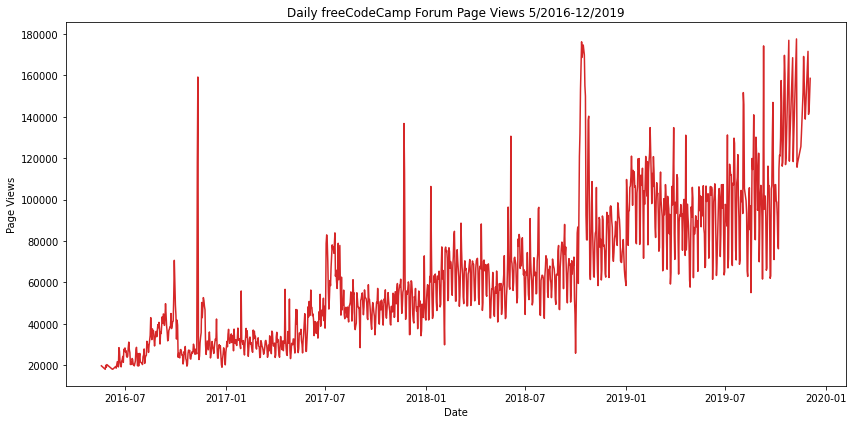

In [5]:
x = draw_line_plot()

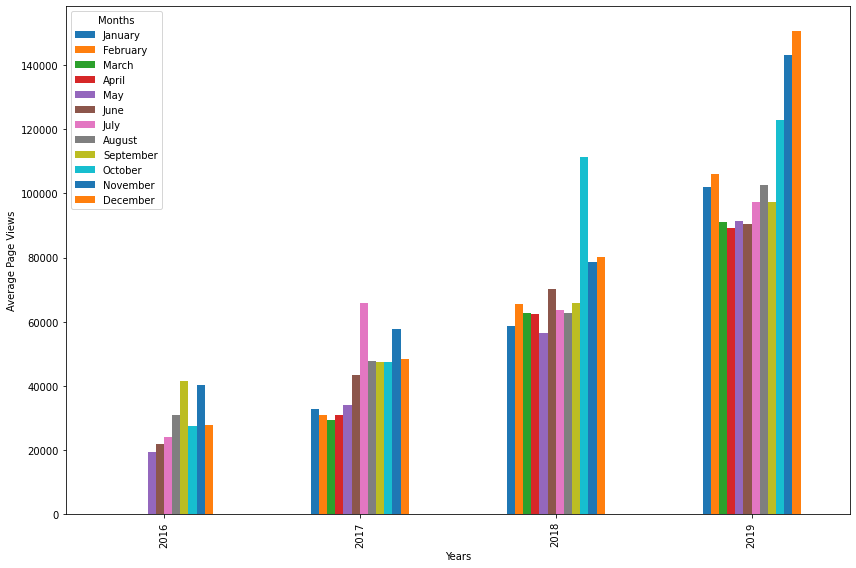

In [6]:
x = draw_bar_plot()

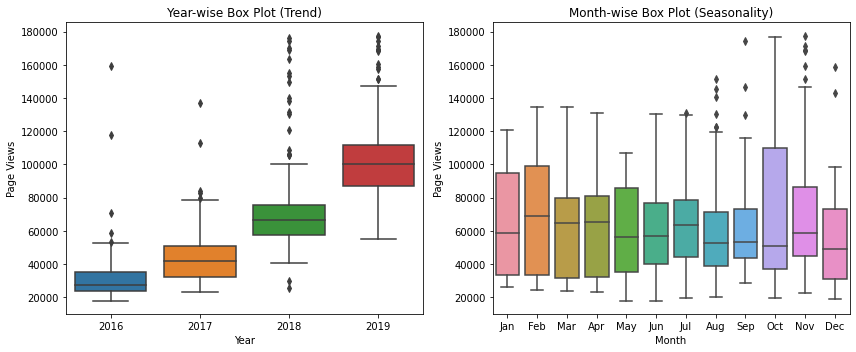

In [7]:
x = draw_box_plot()